In [1]:
from PIL import Image

import albumentations as A
import torchvision.transforms as T

import numpy as np
from utils import RandomPaste
from data.dataset import SyntheticDataset

from pathlib import Path


/home/laurent_fainsin/Documents/unet/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform = A.Compose(
    [
        A.LongestMaxSize(max_size=1024),
        A.Flip(),
        # A.ColorJitter(),
        # RandomPaste(5, "/media/disk1/lfainsin/SPHERES/WHITE", "/media/disk1/lfainsin/SPHERES/HDRIs"),
        RandomPaste(5, "/media/disk1/lfainsin/SPHERES/WHITE", "/dev/null"),
        # A.ColorJitter(),
        A.ToGray(p=0.01),
        # A.GaussianBlur(),
        # A.MotionBlur(),
        A.ISONoise(),
        A.ImageCompression(),
    ],
)

dataset = SyntheticDataset(image_dir="/media/disk1/lfainsin/BACKGROUND/coco/", transform=transform)
transform = T.ToPILImage()


In [3]:
def render(i, image, mask):
    image = transform(image)
    mask = transform(mask)

    path = f"/media/disk1/lfainsin/TRAIN_prerender/{i:06d}/"
    Path(path).mkdir(parents=True, exist_ok=True)

    image.save(f"{path}/image.jpg")
    mask.save(f"{path}/MASK.PNG")


In [4]:
def renderlist(list_i, dataset):
    for i in list_i:
        image, mask = dataset[i]
        render(i, image, mask)


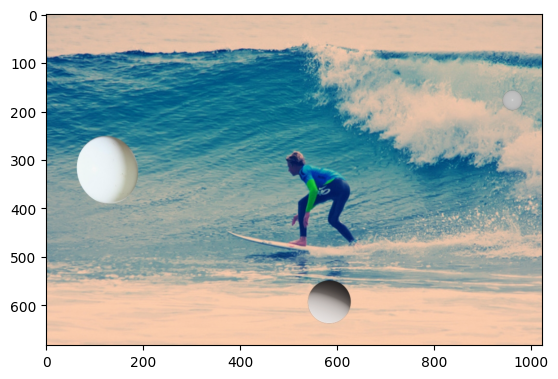

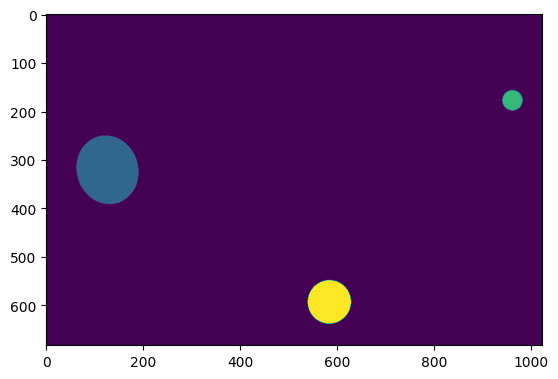

In [12]:
import matplotlib.pyplot as plt

image, mask = dataset[0]

image = transform(image)
mask = transform(mask)

plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(mask)


In [13]:
import _thread

sublists = np.array_split(range(len(dataset)), 16)
for sublist in sublists:
    _thread.start_new_thread(renderlist, (sublist, dataset,))


In [ ]:
from albumentations.pytorch import ToTensorV2
from data.dataset import LabeledDataset

transforms = A.Compose(
    [
        A.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
            max_pixel_value=255,
        ),  # [0, 255] -> coco (?) normalized
        ToTensorV2(),  # HWC -> CHW
    ],
    bbox_params=A.BboxParams(
        format="pascal_voc",
        min_area=0.0,
        min_visibility=0.0,
        label_fields=["labels"],
    ),
)

# dataset = LabeledDataset(image_dir="/dev/shm/TRAIN/", transforms=transforms)
dataset = LabeledDataset(image_dir="/media/disk1/lfainsin/TRAIN_prerender/", transforms=transforms)

In [ ]:
for i in range(len(dataset)):
    print(i, end=", ")
    dataset[i]